In [89]:
from sklearn.cluster import KMeans
import pandas as pd
import pickle
import string
import re
import string
from sklearn.model_selection import cross_validate as cross_validation, ShuffleSplit, cross_val_score, train_test_split, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
import pickle
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])
import seaborn as sns
plt.style.use("dark_background")

# Data Cleaning 

In [90]:
data  = pd.read_csv('/Users/william/Documents/RHoMIS_Data/Data/RHoMIS_Indicators.csv',encoding='latin1')

In [14]:
full_data = pd.read_csv('/Users/william/Documents/RHoMiS_Data/Data/RHoMIS_Full_Data.csv',encoding='latin1')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (11,12,13,17,18,25,26,38,41,42,43,45,46,47,48,49,50,52,53,59,60,61,62,63,64,65,67,70,71,73,75,76,77,79,80,82,85,88,89,91,93,94,95,97,98,100,103,106,107,109,111,112,113,115,116,118,121,124,125,127,129,130,131,133,134,136,139,142,143,145,146,147,148,149,151,152,154,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,221,223,224,225,226,227,228,229,230,231,232,233,234,235,236,239,240,241,242,243,244,245,246,247,248,251,252,253,254,266,267,270,271,272,273,274,275,276,277,278,280,283,284,285,286,287,288,289,290,292,293,294,295,296,297,298,299,300,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,323,325,326,328,329,330,331,332,333,334,335,336,339,340,341,342,343,344,

In [66]:
columns_HFIAS = ['HFIAS_1','HFIAS_2','HFIAS_3','HFIAS_4','HFIAS_5','HFIAS_6','HFIAS_7','HFIAS_8','HFIAS_9']

In [80]:
full_data_HFIAS = full_data[columns_HFIAS]

In [81]:
data_fused = pd.concat([full_data_HFIAS,data],axis=1)

In [82]:
data_fused[columns_HFIAS] = data_fused[columns_HFIAS].replace(['na'],np.NaN)

In [83]:
data_null_HFIAS = data_fused.loc[data_fused['HFIAS_1'].null() & data_fused['HFIAS_2'].null() & data_fused['HFIAS_3'].null() & data_fused['HFIAS_4'].notnull() & data_fused['HFIAS_5'].null() & data_fused['HFIAS_6'].null() & data_fused['HFIAS_7'].null() & data_fused['HFIAS_8'].null() & data_fused['HFIAS_9'].null()] 


In [85]:
data_null_HFIAS['HFIAS_status'].unique()

array(['FoodSecure', 'ModeratelyFI', 'SeverelyFI', 'MildlyFI', nan],
      dtype=object)

In [21]:
data.head()

,ID_PROJ,ID_COUNTRY,YEAR,ITERATION,SURVEY_ID,ID_HH,RHoMIS_ID,GPS_LAT,GPS_LON,GPS_ALT,...,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,GHGEmissions,Gender_MaleControl,Gender_FemaleControl,NFertInput
0,ADN,BF,2019,1,BF_ADN_2019,BF_2019_ADN_1_1,BF_2019_ADN_1_1,11.19,-0.95,254.0,...,0.0,0.717683,0.116832,4621.267353,754.360895,0,702.949550,0.696542,0.303458,NaN
1,ADN,BF,2019,1,BF_ADN_2019,BF_2019_ADN_2_1,BF_2019_ADN_2_1,11.19,-0.95,346.0,...,0.0,0.061435,0.061435,2503.023263,2303.522017,0,94415.087935,0.539852,0.460148,100.0
2,ADN,BF,2019,1,BF_ADN_2019,BF_2019_ADN_3_1,BF_2019_ADN_3_1,11.19,-0.99,324.0,...,0.0,0.000000,0.000000,381.108158,381.108158,9,113.654565,0.695815,0.304185,50.0
3,ADN,BF,2019,1,BF_ADN_2019,BF_2019_ADN_4_1,BF_2019_ADN_4_1,11.19,-0.99,326.0,...,0.0,0.899135,0.034582,9948.141738,620.787518,4,43062.200002,0.243574,0.756426,150.0
4,ADN,BF,2019,1,BF_ADN_2019,BF_2019_ADN_5_1,BF_2019_ADN_5_1,11.22,-1.02,308.0,...,0.0,0.169250,0.051715,2209.261281,1767.543491,0,13331.792068,0.606037,0.393963,250.0


In [10]:
data.count()

ID_PROJ                                         35728
ID_COUNTRY                                      35728
YEAR                                            35728
ITERATION                                       35728
SURVEY_ID                                       35728
ID_HH                                           35728
RHoMIS_ID                                       35728
GPS_LAT                                         34690
GPS_LON                                         34690
GPS_ALT                                         27762
Country                                         35728
Region                                          19462
Altitude                                        27762
HHsizemembers                                   35728
HHsizeMAE                                       34765
HouseholdType                                   34361
Head_EducationLevel                             32738
LandOwned                                       26236
LandCultivated              

In [13]:
data.shape

(35728, 54)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35728 entries, 0 to 35727
Data columns (total 54 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID_PROJ                                       35728 non-null  object 
 1   ID_COUNTRY                                    35728 non-null  object 
 2   YEAR                                          35728 non-null  int64  
 3   ITERATION                                     35728 non-null  int64  
 4   SURVEY_ID                                     35728 non-null  object 
 5   ID_HH                                         35728 non-null  object 
 6   RHoMIS_ID                                     35728 non-null  object 
 7   GPS_LAT                                       34690 non-null  float64
 8   GPS_LON                                       34690 non-null  float64
 9   GPS_ALT                                       27762 non-null 

In [11]:
for column in data:
    print(data[column].describe())


count     35728
unique       69
top         OAF
freq       2713
Name: ID_PROJ, dtype: object
count     35728
unique       33
top          ET
freq       3701
Name: ID_COUNTRY, dtype: object
count    35728.000000
mean      2018.181538
std          1.276994
min       2015.000000
25%       2018.000000
50%       2018.000000
75%       2019.000000
max       2020.000000
Name: YEAR, dtype: float64
count    35728.000000
mean         1.028857
std          0.167407
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: ITERATION, dtype: float64
count           35728
unique             98
top       RW_OAF_2018
freq             2713
Name: SURVEY_ID, dtype: object
count               35728
unique              35698
top       TZ_2016_SRL_1_2
freq                    5
Name: ID_HH, dtype: object
count                 35728
unique                35728
top       BI_2019_SNV_123_1
freq                      1
Name: RHoMIS_ID, dtype: object
count  

In [91]:
negative_col = ['LandCultivated', 'LandOwned','total_income_USD_PPP_pHH_Yr','offfarm_income_USD_PPP_pHH_Yr','value_livestock_prod_consumed_USD_PPP_pHH_Yr','NrofMonthsWildFoodCons']

In [92]:
categorical_col = ['Country','HouseholdType','Head_EducationLevel', 'WorstFoodSecMonth' ,'BestFoodSecMonth','HFIAS_status']
# Head_EducationLevel specification about  possible values was not given so we omit this for now 

In [93]:
#columns with outliers
outliers_col = ['GHGEmissions','NFertInput','Food_Availability_kCal_MAE_day',
'Food_Self_Sufficiency_kCal_MAE_day','TVA_USD_PPP_pmae_pday',
'total_income_USD_PPP_pHH_Yr',
'offfarm_income_USD_PPP_pHH_Yr',
'farm_income_USD_PPP_pHH_Yr',
'value_farm_produce_USD_PPP_pHH_Yr',
'crop_sales_USD_PPP_pHH_Yr',
'value_crop_produce_USD_PPP_pHH_Yr',
'value_crop_consumed_USD_PPP_pHH_Yr',
'livestock_prodsales_USD_PPP_pHH_Yr',
'value_livestock_production_USD_PPP_pHH_Yr',
'value_livestock_prod_consumed_USD_PPP_pHH_Yr',
'LandOwned',
'LandCultivated',
'LivestockHoldings',
'HHsizemembers',
'HHsizeMAE']

In [94]:
# replace negative values for features that are bounded to be positive only  as distance metrics like Land cultivated measured in hectares or Income and PPP earned 

def replace_negative(data,columns):
    for col in columns:
        data.loc[data[col] < 0, col] = np.NaN 
    

# Dictionary for months in different languange to english
months_to_eng = { 'ukuboza': 'dec','gashyantare' : 'feb', 'kamena' : 'jun', 'mutarama': 'jan', 'nyakanga' : 'jul' ,'nzeri' : 'sep','ukwakira' : 'oct',
                 'gicurasi' : 'may' , 'werurwe' : 'mar', 'kanama' : 'aug','ugushyingo' : 'nov' ,'mata' : 'apr'  }

def process_months(var):
    if var in months_to_eng:
            return  months_to_eng.get(var)
    else: return var    
                
translate = lambda x : process_months(x)

def process_status(var):
    if var in HFIAS_status:
        return HFIAS_status.get(var)

encode = lambda x : process_status(x)

# encode ordinal data 
HFIAS_status = {'SeverelyFI':4,'ModeratelyFI':3,'MildlyFI':2,'FoodSecure':1 }
status = ['SeverelyFI','ModeratelyFI','MildlyFI','FoodSecure']

# assigning food security level to raw scores 
def discrete_assignment(score):
    if score >= 7: return status[0]
    elif (score == 4) or (score == 5) or (score == 6): return status[1]
    elif (score == 2) or (score == 3): return status[2]
    elif (score == 0) or (score == 1): return status[3]
    else: return np.NaN 

fies_assignment = lambda x : discrete_assignment(x)


def process_scales(hfias,fies):
    if ( pd.isnull(hfias)) and (pd.isnull(fies)): return np.NaN
    elif (pd.isnull(hfias)) and (pd.notnull(fies)): return fies
    elif (pd.notnull(hfias)) and (pd.notnull(fies)): return hfias
#     hfias not missing , fies missing
    else: return hfias 

new_scale = lambda x : process_scales(x['HFIAS_status'],x['FIES_Score'])


map_educationlevel = {'primary':'primary',
                      'No_school':'no_school',
                      'secondary':'secondary',
                      'no_school':'no_school',
                      'postsecondary':'postsecondary',
                      'adulteducation':'adulteducation',
                      'illiterate':'illiterate',
                      'literate':'literate',
                      'secondary_1':'secondary',
                      'primary_2':'primary',
                       'no school': 'no_school',
                     'lower_secondary': 'secondary',
                     'secondary2':'secondary',
                      'primary_1': 'primary'}


def process_educationlevel(var):
    if var in map_educationlevel:
            return  map_educationlevel.get(var)
    elif var == 'nan': return np.NaN   
    else: return 'Other'
                
    
education = lambda x : process_educationlevel(x)

In [95]:
#columns where outliers should not be removed more than once  
x_col = ['total_income_USD_PPP_pHH_Yr',
        'offfarm_income_USD_PPP_pHH_Yr',
        'farm_income_USD_PPP_pHH_Yr',
        'crop_sales_USD_PPP_pHH_Yr',
        'livestock_prodsales_USD_PPP_pHH_Yr',
        'value_livestock_production_USD_PPP_pHH_Yr',
        'value_livestock_prod_consumed_USD_PPP_pHH_Yr']

In [96]:
def remove_all_outliers(df_in, col_name):
    loop_count = 0
    outlier_count = count_outliers(df_in, col_name)

    while outlier_count > 0:
        loop_count += 1

        if (loop_count > 100):
            break
            
        if (col_name in  x_col) and (loop_count) >1:
            break
            
        remove_outliers(df_in, col_name)
        outlier_count = count_outliers(df_in, col_name)
    
def set_outliers(x,minimum,maximum):
    if (x < minimum) | (x > maximum):
        return np.NaN
    else: return x
    


def get_iqr_values(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25) # 25th percentile / 1st quartile
    q3 = df_in[col_name].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def get_iqr_text(df_in, col_name):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values(df_in, col_name)
    text = f"median={median:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f}, minimum={minimum:.2f}, maximum={maximum:.2f}"
    return text

def remove_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name) 
    df_in[col_name] = df_in[col_name].apply(lambda x : set_outliers(x,minimum,maximum))

def count_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_outliers = df_in.loc[(df_in[col_name] < minimum) | (df_in[col_name] > maximum)]
    return df_outliers.shape[0]

def process_outliers(df):
    for column in df:
        if column in outliers_col:
            remove_all_outliers(df,column)
            
         

In [97]:
def data_preprocessing(data):
    data_model = data.copy()
    data_model = data.drop(['ID_PROJ','ID_COUNTRY','SURVEY_ID','Region','ID_HH','RHoMIS_ID','Altitude','currency_conversion_factor','YEAR'],axis=1)
#     replace negative values with nan for numerical data
    replace_negative(data_model,outliers_col)
    
    #replace 13 Months value with nan for 'NrofMonthsWildFoodCons'
    data_model['NrofMonthsWildFoodCons'] = data_model['NrofMonthsWildFoodCons'].replace([13,'13'],np.NaN)
    #remove outliers 
    process_outliers(data_model)
    
    # replace  HFIAS status with 0 with missing value 
    data_model['HFIAS_status'] = data_model['HFIAS_status'].replace([0,'0'],np.NaN)
    #replace HHmembers and HHsizemae 0's with missing value
    data_model['HHsizemembers'] = data_model['HHsizemembers'].replace(['0',0],np.NaN)
    data_model['HHsizeMAE'] = data_model['HHsizeMAE'].replace([0,'0'],np.NaN)
    # set negative values of livestock holdings to zero
    data_model.loc[data_model['LivestockHoldings'] < 0,  'LivestockHoldings'] = 0
    #replace WorstFoodSecMonth and BestFoodSecMonth with No_answer or none with  missing value 

    data_model['WorstFoodSecMonth'] = data_model['WorstFoodSecMonth'].replace(['No_answer','no_answer','None',0,'0'],np.NaN)
    data_model['BestFoodSecMonth'] = data_model['BestFoodSecMonth'].replace(['No_answer','no_answer','None',0,'0'],np.NaN)
#     replace HouseHold type with no answer to missing value 
    data_model['HouseholdType'] = data_model['HouseholdType'].replace(['no_answer',0,'0'],np.NaN)
#     replace some  head_Educationlevel responsees to missing value
    data_model['Head_EducationLevel'] = data_model['Head_EducationLevel'].replace(['No_answer','no_answer','None','none',0,'0'],'nan')
#     translate months to english
    data_model['BestFoodSecMonth'] = data_model.BestFoodSecMonth.apply(translate)
    data_model['WorstFoodSecMonth'] = data_model.WorstFoodSecMonth.apply(translate)
#     encode categorical  HFIAS status
    data_model['HFIAS_status'] = data_model.HFIAS_status.apply(process_status)
#     perform discrete assignments on the FIES scores 
    data_model['FIES_Score'] = data_model.FIES_Score.apply(fies_assignment)
#     encode categorical FIES status
    data_model['FIES_Score'] =  data_model.FIES_Score.apply(process_status)
#    create new column representing uniform food insecurity score across dataset
    data_model['Food_InsecurityLevel'] = data_model.apply(new_scale,axis=1)
    data_model = data_model.drop(['HFIAS_status','FIES_Score'],axis=1)
#     map Head_educationLevel to specific values 
    data_model['Head_EducationLevel'] = data_model['Head_EducationLevel'].apply(education)
    # drop empty rows
    data_model = data_model.drop(data_model[data_model['Country'] == 0].index)
    #drop outlier values  for HHmae
#     data_model = data_model.drop(data_model[data_model['HHsizeMAE'] == data_model['HHsizeMAE'].max()].index)
    return data_model
    
    

    


In [98]:
clean_data = data_preprocessing(data)
clean_data_cp = clean_data.copy()

In [86]:
# preprocess on full data 
clean_full_data = data_preprocessing(data_null_HFIAS)

In [99]:
# data pefore imputation of categorical features

# clean_full_data.to_pickle('full_data.pkl')

# clean_data.to_pickle('basic_preprocessed_data.pkl')

### Impute  missing categorical data 

In [98]:
# using simple imputer 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

clean_data_cp.BestFoodSecMonth = imputer.fit_transform(clean_data_cp['BestFoodSecMonth'].values.reshape(-1,1))[:,0]

clean_data_cp.WorstFoodSecMonth = imputer.fit_transform(clean_data_cp['WorstFoodSecMonth'].values.reshape(-1,1))[:,0]

clean_data_cp.Head_EducationLevel = imputer.fit_transform(clean_data_cp['Head_EducationLevel'].values.reshape(-1,1))[:,0]

clean_data_cp.HouseholdType = imputer.fit_transform(clean_data_cp['HouseholdType'].values.reshape(-1,1))[:,0]




In [92]:
# #save file before encoding 
clean_data_cp.to_pickle('preprocessed_data.pkl')

### Encode categorical data

In [93]:
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder

class OneHotEncoder(SklearnOneHotEncoder):
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False

    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out

    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X=X)
        d_out = pd.DataFrame(sparse_matrix.toarray(), columns=new_columns, index=X.index)
        return d_out

    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)

    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f'{column}_<{self.categories_[i][j]}>')
                j += 1
        return new_columns

### One-Hot Encoding All Categorical data

In [94]:
encoder = OneHotEncoder()

categories = ['BestFoodSecMonth','WorstFoodSecMonth','Head_EducationLevel','HouseholdType','Country']
for i in categories:
    data_enc = encoder.fit_transform(clean_data_cp[[i]])
    clean_data_cp = clean_data_cp.join(data_enc)

clean_data_cp = clean_data_cp.drop(['BestFoodSecMonth','WorstFoodSecMonth','Head_EducationLevel','HouseholdType','Country'],axis =1)


In [95]:
clean_data_cp.to_pickle('onehot_encoded_clean_data.pkl')

### Cyclic Encoding for Month Data and One-hot Encoding for the rest of the data

In [99]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
clean_data_cp['BestFoodSecMonth']= le.fit_transform(clean_data_cp['BestFoodSecMonth'])
clean_data_cp['WorstFoodSecMonth']= le.fit_transform(clean_data_cp['WorstFoodSecMonth'])


def cyclical_encoder(data, column):    
    months_in_year = 12
    sin_name = 'sin' + column
    cos_name = 'cos' + column
    data[sin_name] = np.sin(2*np.pi*data[column]/months_in_year)
    data[cos_name] = np.cos(2*np.pi*data[column]/months_in_year)
    data.drop(column, axis=1, inplace=True)
    data.head()

    
cyclical_encoder(clean_data_cp,'BestFoodSecMonth')
cyclical_encoder(clean_data_cp,'WorstFoodSecMonth')

categories = ['Head_EducationLevel','HouseholdType','Country']
for i in categories:
    data_enc =  pd.DataFrame(encoder.fit_transform(clean_data_cp[[i]]))
    clean_data_cp = clean_data_cp.join(data_enc)

clean_data_cp = clean_data_cp.drop(['Head_EducationLevel','HouseholdType','Country'],axis =1 )


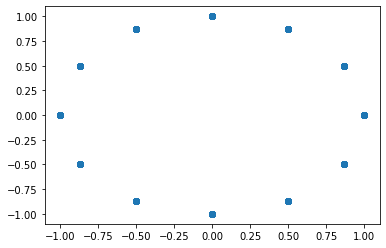

In [78]:
plt.scatter(clean_data_cp['sinBestFoodSecMonth'], clean_data_cp['cosBestFoodSecMonth'])
plt.show()

In [100]:
clean_data_cp.to_pickle('Cyclical_encoded_data.pkl')

# Imputation

#### Columns with missing Data and count 

In [124]:
missing_data = pd.DataFrame(clean_data[clean_data.columns[clean_data.isnull().any()]].isnull().sum()/len(clean_data)*100)

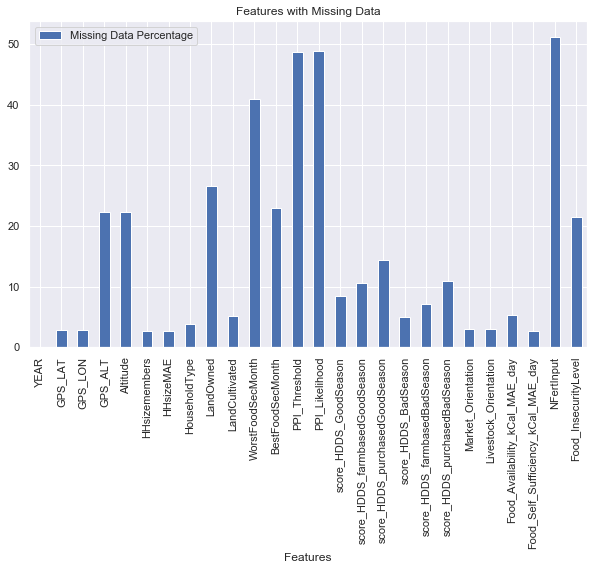

In [79]:
data_pre = pd.read_pickle('preprocessed_data.pkl')

### ListWise/Case Deletion 

In [209]:
list_wise_data = data_pre.copy()
list_wise_data.dropna(inplace = True)
percetange_observation_left = (len(list_wise_data)/ len(data_pre))*100

In [210]:
percentage_observation_left

0.24910434393193015

In [212]:
list_wise_data.head()

,YEAR,ITERATION,ID_HH,RHoMIS_ID,GPS_LAT,GPS_LON,GPS_ALT,Altitude,HHsizemembers,HHsizeMAE,...,Type_couple_polygamous,Type_couple_woman_works_away,Type_man_single,Type_nonparenthead,Type_other,Type_polygamous,Type_single,Type_together,Type_woman_single,Type_workaway
32480,2019.0,1,UG_2019_NT1_2_1,UG_2019_NT1_2_1,1.39,31.34,1173.67,1173.671341,2.0,1.33,...,0,0,0,0,0,0,0,0,1,0
32507,2019.0,1,UG_2019_NT1_29_1,UG_2019_NT1_29_1,1.38,31.34,1161.70,1161.702998,10.0,6.65,...,0,0,0,0,0,0,0,0,1,0
32512,2019.0,1,UG_2019_NT1_34_1,UG_2019_NT1_34_1,1.38,31.32,1140.20,1140.198340,10.0,6.78,...,0,0,0,0,0,0,0,0,0,0
32513,2019.0,1,UG_2019_NT1_35_1,UG_2019_NT1_35_1,1.39,31.32,1131.14,1131.135762,9.0,5.79,...,0,0,0,0,0,0,0,0,1,0
32514,2019.0,1,UG_2019_NT1_36_1,UG_2019_NT1_36_1,1.38,31.32,1121.58,1121.581565,7.0,4.85,...,0,0,0,0,0,0,0,0,0,0
